# Importing required packages and dependencies

In [1]:
import diffusers
import pandas as pd
import numpy as np
import transformers 
from diffusers import DiffusionPipeline

c:\Users\Chirag\.conda\envs\ai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Setting the pipeline
pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",use_safetensors=True)

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


In [3]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
image = pipeline("Harry potter playing cricket in india streets").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\Chirag\.conda\envs\ai\lib\site-packages\diffusers\models\attention_processor.py:1276: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 50/50 [26:44<00:00, 32.09s/it] 


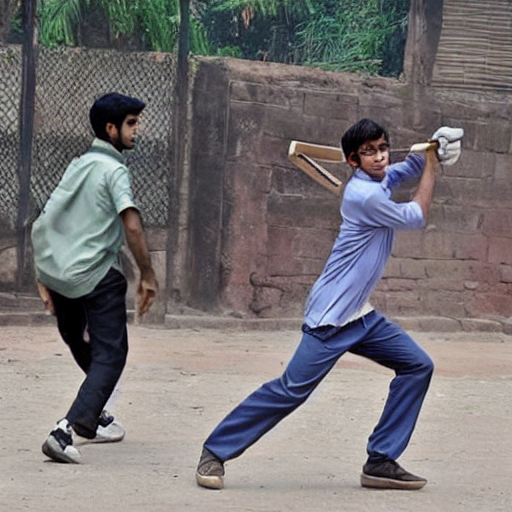

In [9]:
image

In [8]:
from diffusers import EulerDiscreteScheduler
pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)

In [10]:
image = pipeline("Harry potter playing cricket in india streets").images[0]

100%|██████████| 50/50 [25:56<00:00, 31.13s/it]


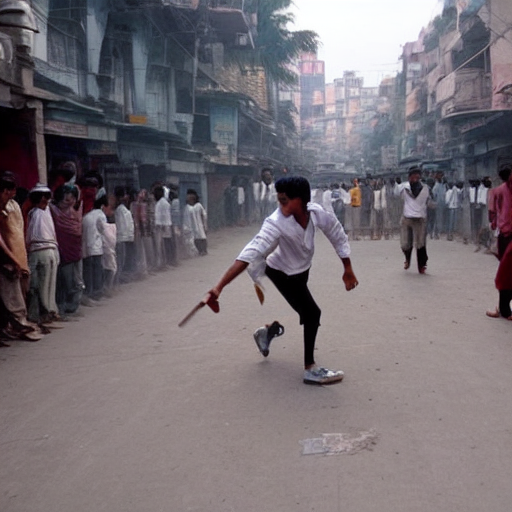

In [11]:
image

<html><body>
<h1>Models</h1>
<p> Models predict the noise residual ( the difference between a less noisy image and the input image)
    
</p>
</body></html>

In [12]:
from diffusers import UNet2DModel
repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [13]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [14]:
import torch
# creating a noisy sample
noisy_sample = torch.randn(1,model.config.in_channels,model.config.sample_size,model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [15]:
with torch.no_grad():
    noisy_residual = model(sample=noisy_sample, timestep=2).sample

# Generation = Model + Scheduler

In [16]:
from diffusers import DDPMScheduler
scheduler = DDPMScheduler.from_pretrained(repo_id)

In [17]:
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.28.0.dev0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [18]:
less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2,sample=noisy_sample).prev_sample
less_noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [ ]:
# Creating a function to postprocess and display denoised image
import PIL.Image
